In [253]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator

from keras.layers import Dense, LSTM, Dropout

#dataset = pd.read_excel("/content/vysledny_dataset.xlsx")
dataset = pd.read_excel("/content/kombinovane_data.xlsx")

features = dataset.drop(columns=["Rozsev 0-5"])
targets = dataset["Rozsev 0-5"]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.1, random_state=1234, shuffle=True)
n_input = 1
n_features = X_train.shape[1]

X_train = X_train.reshape((X_train.shape[0], n_input, n_features))
X_test = X_test.reshape((X_test.shape[0], n_input, n_features))

In [269]:
model = Sequential()
model.add(LSTM(units = 128,return_sequences=True,input_shape=(None, 25)))
#model.add(Dropout(0.2))
model.add(LSTM(units = 64,return_sequences=False,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(16))
#model.add(Dropout(0.1))
model.add(Dense(8))
model.add(Dense(1))

print(model.summary())

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_131 (LSTM)             (None, None, 128)         78848     
                                                                 
 lstm_132 (LSTM)             (None, 64)                49408     
                                                                 
 dense_77 (Dense)            (None, 64)                4160      
                                                                 
 dense_78 (Dense)            (None, 32)                2080      
                                                                 
 dense_79 (Dense)            (None, 16)                528       
                                                                 
 dense_80 (Dense)            (None, 8)                 136       
                                                                 
 dense_81 (Dense)            (None, 1)               

In [270]:
tf.keras.optimizers.Adam(
   learning_rate=0.01,
   beta_1=0.9,
   beta_2=0.999,
   epsilon=1e-07,
   amsgrad=False,
   name="Adam"
)

In [271]:
model.compile(
    loss='mean_squared_error',  # Použijeme strednú kvadratickú chybu pre regresiu
    optimizer='Adam',
    metrics=['mean_absolute_error']  # Použijeme metriku priemernú absolútnu chybu pre regresiu
)

In [272]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=300,
)

Epoch 1/300
15/15 [==============================] - 8s 243ms/step - loss: 113.6377 - mean_absolute_error: 9.8924 - val_loss: 106.3080 - val_mean_absolute_error: 9.7198
Epoch 2/300
15/15 [==============================] - 0s 13ms/step - loss: 99.3786 - mean_absolute_error: 9.1358 - val_loss: 79.6712 - val_mean_absolute_error: 8.2535
Epoch 3/300
15/15 [==============================] - 0s 14ms/step - loss: 55.8441 - mean_absolute_error: 6.3081 - val_loss: 19.6913 - val_mean_absolute_error: 3.4286
Epoch 4/300
15/15 [==============================] - 0s 15ms/step - loss: 24.4050 - mean_absolute_error: 3.6550 - val_loss: 15.7493 - val_mean_absolute_error: 2.9287
Epoch 5/300
15/15 [==============================] - 0s 20ms/step - loss: 17.6572 - mean_absolute_error: 2.9423 - val_loss: 13.0441 - val_mean_absolute_error: 2.5741
Epoch 6/300
15/15 [==============================] - 0s 25ms/step - loss: 15.2364 - mean_absolute_error: 2.7350 - val_loss: 11.2407 - val_mean_absolute_error: 2.2619
E

29/29 [==============================] - 1s 4ms/step


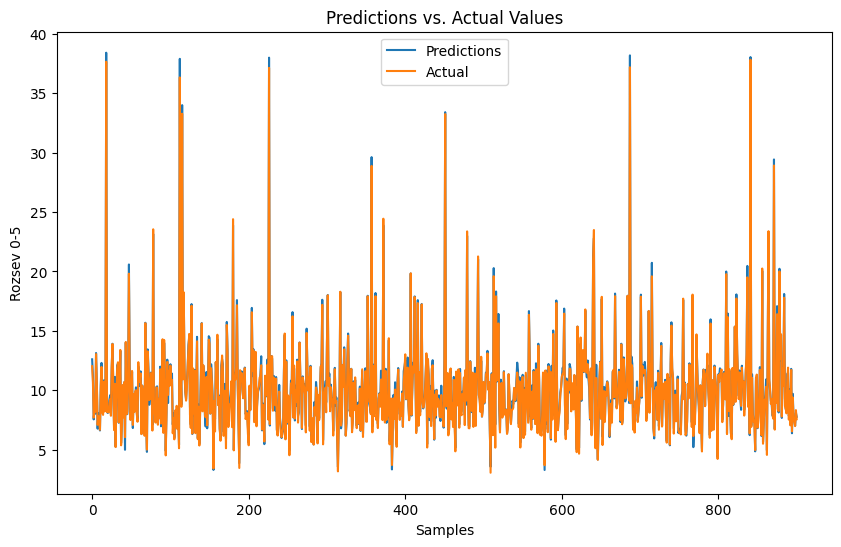

In [273]:
import matplotlib.pyplot as plt
# Predict on test data
predictions = model.predict(X_train)

# Plot predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predictions')
plt.plot(y_train.values, label='Actual')
plt.xlabel('Samples')
plt.ylabel('Rozsev 0-5')
plt.title('Predictions vs. Actual Values')
plt.legend()
plt.show()

In [274]:
predicted_values_train = model.predict(X_train)
print(predicted_values_train.shape)
predicted_values_train = predicted_values_train.reshape(-1, )

# Porovnanie s reálnymi hodnotami
original_predicted = pd.DataFrame({"Skutočné hodnoty": y_train, "Predikované hodnoty": predicted_values_train})
original_predicted

29/29 [==============================] - 0s 3ms/step
(901, 1)


,Skutočné hodnoty,Predikované hodnoty
245,12.020000,12.599405
205,10.700000,11.210786
228,7.690000,7.539674
146,8.210000,8.400848
928,8.176514,8.025562
...,...,...
204,7.460000,7.688076
53,7.360000,7.517314
294,6.980000,7.008067
723,8.322027,8.098394


4/4 [==============================] - 0s 6ms/step


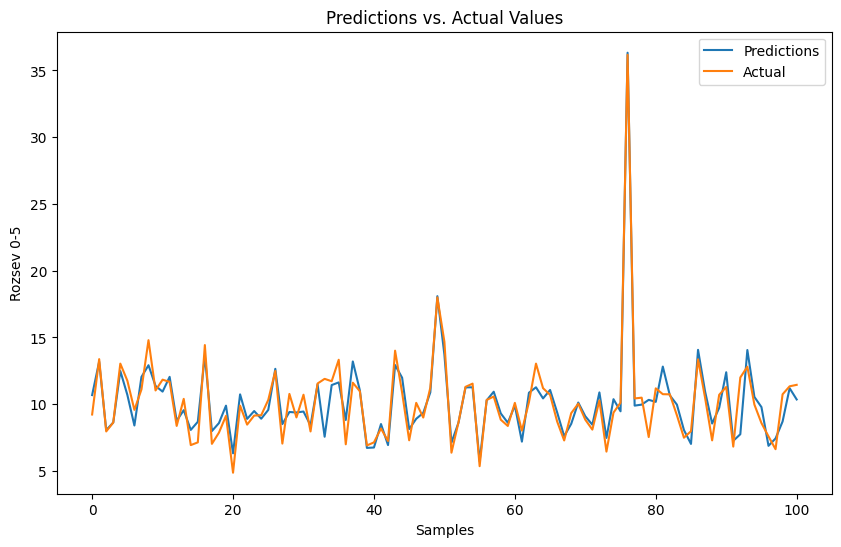

In [275]:
# Predict on test data
predictions = model.predict(X_test)

# Plot predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predictions')
plt.plot(y_test.values, label='Actual')
plt.xlabel('Samples')
plt.ylabel('Rozsev 0-5')
plt.title('Predictions vs. Actual Values')
plt.legend()
plt.show()

In [276]:
predicted_values_valid = model.predict(X_test)
print(predicted_values_valid.shape)
predicted_values_valid = predicted_values_valid.reshape(-1, )

# Porovnanie s reálnymi hodnotami
original_predicted_val = pd.DataFrame({"Skutočné hodnoty": y_test, "Predikované hodnoty": predicted_values_valid})
original_predicted_val

4/4 [==============================] - 0s 4ms/step
(101, 1)


,Skutočné hodnoty,Predikované hodnoty
835,9.228050,10.684349
992,13.375318,13.187778
155,7.960000,8.059951
769,8.631139,8.629012
438,13.040000,12.489867
...,...,...
192,7.590000,6.881453
836,6.629634,7.432553
616,10.741360,8.704185
118,11.340000,11.199143


In [ ]:
# Nepresný model
#model = keras.Sequential()
#model.add(layers.LSTM(75, input_shape=(None, 25), return_sequences=True))
##model.add(layers.Dropout(0.2))
#model.add(layers.BatchNormalization())
#model.add(layers.LSTM(75, return_sequences=True))
##model.add(layers.Dropout(0.2))
#model.add(layers.BatchNormalization())
#model.add(layers.LSTM(75))
#model.add(layers.Dropout(0.1))
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(1))
#print(model.summary())